# Imports

In [1]:
import numpy as np
from hmagnet import HMagNet, config

import matplotlib.pyplot as plt
import seaborn as sns

# Set the number of CPU cores

In [2]:
config(jobs=6)

# Synthetize spectra

In [3]:
net = HMagNet("large")

# teff, logg, mh, bfield, vsini
x = np.array([3587.42, 3.33, 0.15, 3.6, 14.52])

spectrum = net.synthetize_spectra(x)
print(spectrum.shape)

No GPU detected, using CPU.
(1, 1328)


## Plot synthetic spectra

<Axes: >

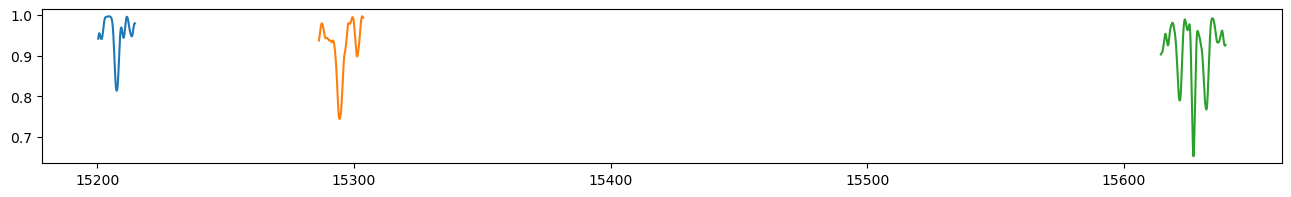

In [4]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], hue=net.get_segments(), legend=False)

# Inversion

In [5]:
solution, inv_spectra, fitness = net.inversion(spectrum, n_particles=1024, iters=50, verbose=1)

----- Start PSO -----
----------------------------
Iteration: 1   Best Fitness: 0.0001899899103901631
----------------------------
Iteration: 2   Best Fitness: 7.907516279810345e-05
----------------------------
Iteration: 3   Best Fitness: 4.693893917245026e-05
----------------------------
Iteration: 4   Best Fitness: 1.866264424723062e-05
----------------------------
Iteration: 5   Best Fitness: 1.866264424723062e-05
----------------------------
Iteration: 6   Best Fitness: 1.0206526353530262e-05
----------------------------
Iteration: 7   Best Fitness: 8.602100992350377e-06
----------------------------
Iteration: 8   Best Fitness: 3.948391264523441e-06
----------------------------
Iteration: 9   Best Fitness: 3.948391264523441e-06
----------------------------
Iteration: 10   Best Fitness: 3.948391264523441e-06
----------------------------
Iteration: 11   Best Fitness: 3.6745273555209095e-06
----------------------------
Iteration: 12   Best Fitness: 3.6745273555209095e-06
------------

## Plot observed versus inversion spectra solution

<Axes: >

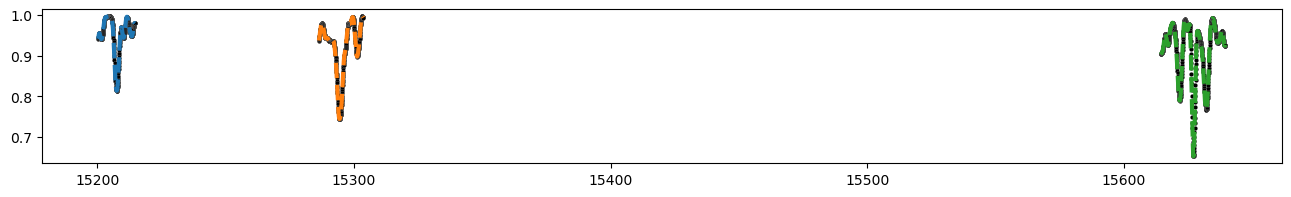

In [6]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], hue=net.get_segments(), legend=False, linewidth=3, linestyle='--')
sns.scatterplot(x=net.get_wavelength(), y=inv_spectra, s=10, linewidth=0.1, color='black')

# Make new objective function

In [7]:
from sklearn.metrics import mean_absolute_error
def obj(y_true, y_pred): # (n_particles,1328)
    return mean_absolute_error(y_true.T, y_pred.T, multioutput='raw_values') # return (n_particles,)

In [8]:
solution, inv_spectra, fitness = net.inversion(spectrum, n_particles=1024, iters=50, objective_function=obj, verbose=1)

----- Start PSO -----
----------------------------
Iteration: 1   Best Fitness: 0.010416827131044401
----------------------------
Iteration: 2   Best Fitness: 0.0077904168143749395
----------------------------
Iteration: 3   Best Fitness: 0.004969500337713457
----------------------------
Iteration: 4   Best Fitness: 0.002751639386743388
----------------------------
Iteration: 5   Best Fitness: 0.002751639386743388
----------------------------
Iteration: 6   Best Fitness: 0.0027357040795976703
----------------------------
Iteration: 7   Best Fitness: 0.001971282068720483
----------------------------
Iteration: 8   Best Fitness: 0.0018070363882282247
----------------------------
Iteration: 9   Best Fitness: 0.0017645787877792868
----------------------------
Iteration: 10   Best Fitness: 0.0013127422525629965
----------------------------
Iteration: 11   Best Fitness: 0.0010987525240591944
----------------------------
Iteration: 12   Best Fitness: 0.0006609866917056534
--------------------

## Plot observed versus inversion spectra solution

<Axes: >

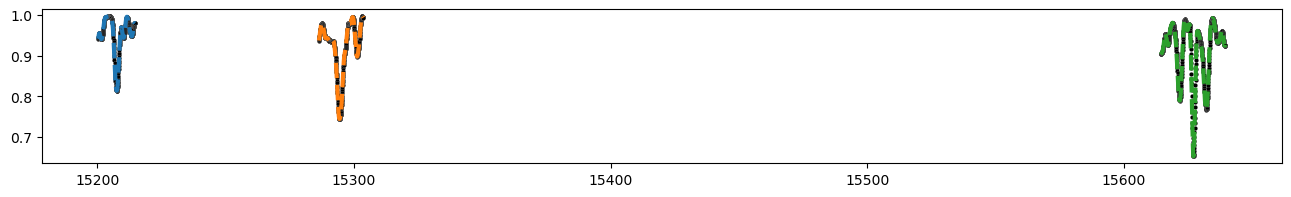

In [9]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], hue=net.get_segments(), legend=False, linewidth=3, linestyle='--')
sns.scatterplot(x=net.get_wavelength(), y=inv_spectra, s=10, linewidth=0.1, color='black')

# Inversion with fixed parameters

In [10]:
solution, inv_spectra, fitness = net.inversion(spectrum, n_particles=1024, iters=50, fixed_logg=3.12, fixed_vsini=13.78, verbose=1)

----- Start PSO -----
----------------------------
Iteration: 1   Best Fitness: 7.876788027726444e-06
----------------------------
Iteration: 2   Best Fitness: 7.876788027726444e-06
----------------------------
Iteration: 3   Best Fitness: 5.1819671847584105e-06
----------------------------
Iteration: 4   Best Fitness: 4.157400830695747e-06
----------------------------
Iteration: 5   Best Fitness: 2.8552701832486477e-06
----------------------------
Iteration: 6   Best Fitness: 2.4418697613845735e-06
----------------------------
Iteration: 7   Best Fitness: 2.38957017349361e-06
----------------------------
Iteration: 8   Best Fitness: 2.3384357133606804e-06
----------------------------
Iteration: 9   Best Fitness: 2.3384357133606804e-06
----------------------------
Iteration: 10   Best Fitness: 2.3384357133606804e-06
----------------------------
Iteration: 11   Best Fitness: 2.3384357133606804e-06
----------------------------
Iteration: 12   Best Fitness: 2.338121154091639e-06
---------

## Plot observed versus inversion spectra solution

<Axes: >

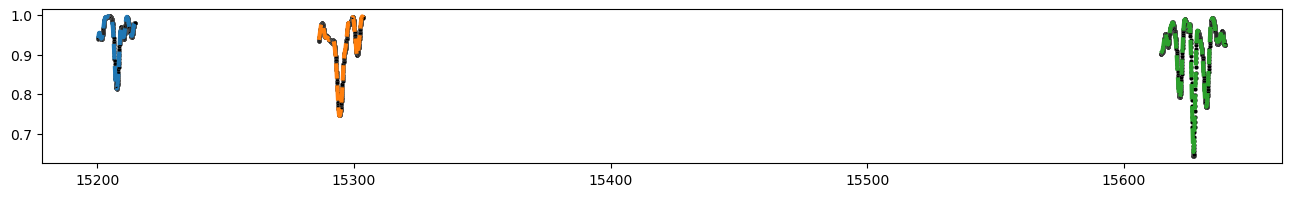

In [11]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], hue=net.get_segments(), legend=False, linewidth=3, linestyle='--')
sns.scatterplot(x=net.get_wavelength(), y=inv_spectra, s=10, linewidth=0.1, color='black')

# Inversion with range in params (teff,logg,mh,bfield,vsini)

In [12]:
solution, inv_spectra, fitness = net.inversion(spectrum, n_particles=1024, iters=50, teff_range=(3000,5000), vsini_range=(15,35), verbose=1)

----- Start PSO -----
----------------------------
Iteration: 1   Best Fitness: 6.744858026051591e-05
----------------------------
Iteration: 2   Best Fitness: 5.063273113630107e-05
----------------------------
Iteration: 3   Best Fitness: 1.3503143524603138e-05
----------------------------
Iteration: 4   Best Fitness: 9.160365597624274e-06
----------------------------
Iteration: 5   Best Fitness: 3.7566468519792073e-06
----------------------------
Iteration: 6   Best Fitness: 2.453096338407413e-06
----------------------------
Iteration: 7   Best Fitness: 2.453096338407413e-06
----------------------------
Iteration: 8   Best Fitness: 1.7164643127070647e-06
----------------------------
Iteration: 9   Best Fitness: 1.7164643127070647e-06
----------------------------
Iteration: 10   Best Fitness: 1.3961562498123407e-06
----------------------------
Iteration: 11   Best Fitness: 1.3961562498123407e-06
----------------------------
Iteration: 12   Best Fitness: 7.632229259700644e-07
---------

## Plot observed versus inversion spectra solution

<Axes: >

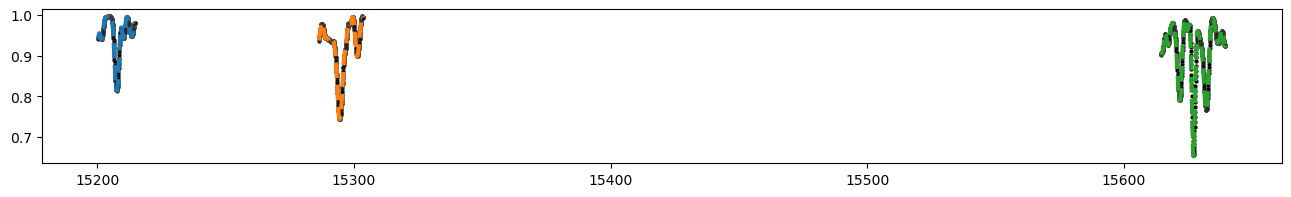

In [13]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], hue=net.get_segments(), legend=False, linewidth=3, linestyle='--')
sns.scatterplot(x=net.get_wavelength(), y=inv_spectra, s=10, linewidth=0.1, color='black')

# Inversion with filling factor on magnetic field

In [14]:
# teff, logg, mh and vsini need to be fixed 
# fixed_bfields are the steps on magnetic field, each one is associated with one filling factor
solution, inv_spectra, fitness = net.mag_filling_factor_inversion(spectrum, n_particles=1024, iters=50, fixed_teff=3580, fixed_logg=3.3, fixed_mh=0.15, fixed_vsini=15, fixed_bfields=[0,2,4,6,8,10,12], verbose=1)

----- Start PSO -----
----------------------------
Iteration: 1   Best Fitness: 5.83691297188471e-05
----------------------------
Iteration: 2   Best Fitness: 3.346586776369127e-05
----------------------------
Iteration: 3   Best Fitness: 3.127744050958155e-05
----------------------------
Iteration: 4   Best Fitness: 2.6374499543934008e-05
----------------------------
Iteration: 5   Best Fitness: 2.4676598117696893e-05
----------------------------
Iteration: 6   Best Fitness: 2.4676598117696893e-05
----------------------------
Iteration: 7   Best Fitness: 2.4676598117696893e-05
----------------------------
Iteration: 8   Best Fitness: 2.354162954933101e-05
----------------------------
Iteration: 9   Best Fitness: 2.1946868277905138e-05
----------------------------
Iteration: 10   Best Fitness: 2.164896713244224e-05
----------------------------
Iteration: 11   Best Fitness: 1.761874491215877e-05
----------------------------
Iteration: 12   Best Fitness: 1.761874491215877e-05
-----------

## Plot observed versus inversion spectra solution

<Axes: >

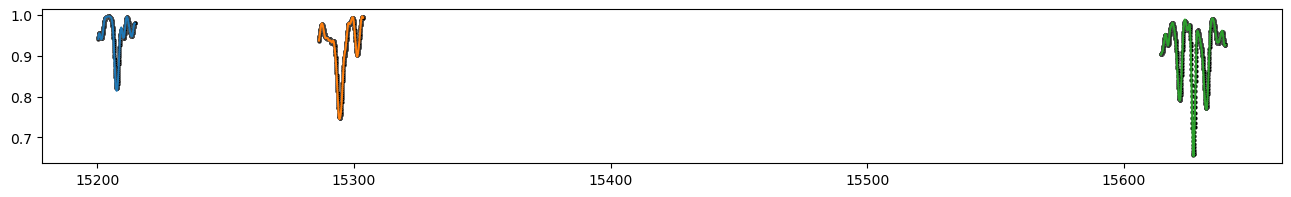

In [15]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], hue=net.get_segments(), legend=False)
sns.scatterplot(x=net.get_wavelength(), y=inv_spectra, s=10, linewidth=0.1, color='black')

# Inversion with observed spectra

Need provide the flux and wavelength, the code interpolate the flux to the steps in wavelength to match with the synthetizer and determine the regions to compare by the parameter tol (tolerance of gap between 2 wavelength points)

In [16]:
data = np.genfromtxt('example_observed_spectra.txt')
wl = data[:, 0]
flux = data[:, 1]

In [17]:
# free all parameters
solution, inv_spectra, fitness = net.inversion(flux, wl, n_particles=1024, iters=50, tol=1, min_wlp=4, verbose=0)

Best Fitness: 0.00034040211336587166

|     Teff |   Logg |    M/H | Bfield |    Vsini |
|  4784.48 |   5.00 |   0.03 | 1.30   |     6.89 |
        


In [18]:
# filling factor inversion
solution, inv_spectra, fitness = net.mag_filling_factor_inversion(flux, wl, n_particles=1024, iters=50, fixed_teff=4789.21, fixed_logg=5.00, fixed_mh=0.03, fixed_vsini=7.40, fixed_bfields=[0,1,2,4,6,8,10,12], tol=1, min_wlp=4, verbose=0)

Best Fitness: 0.00034436040272483735
[0.31552098 0.30313005 0.34749105 0.00070447 0.00505627 0.0170223
 0.00437396 0.00670091]


(15200.0, 15300.0)

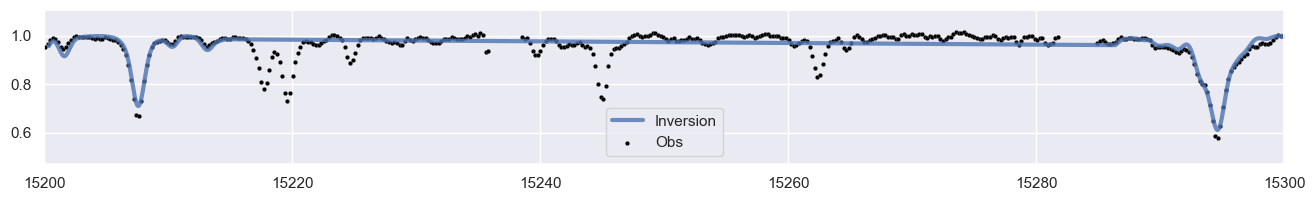

In [30]:
wl_synth = net.get_wavelength()
fig, ax = plt.subplots(figsize=(16, 2))
ax = sns.lineplot(x=wl_synth, y=inv_spectra, legend=False, linewidth=3, linestyle='-', alpha=0.8, ax=ax, label='Inversion')
ax = sns.scatterplot(x=wl, y=flux, s=10, linewidth=0.1, color='black', ax=ax, label='Obs')
plt.xlim(15200,15300)

(15610.0, 15640.0)

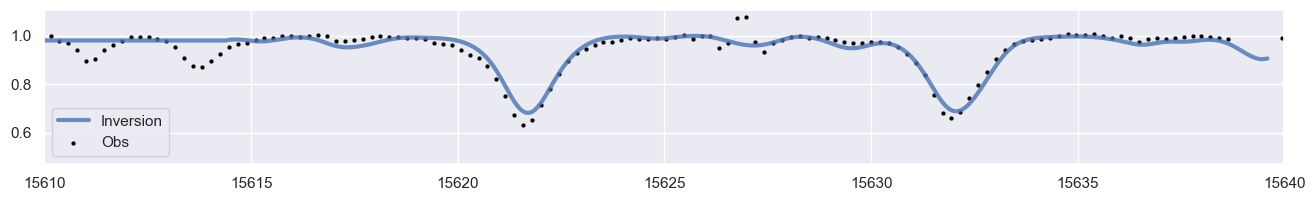

In [31]:
wl_synth = net.get_wavelength()
fig, ax = plt.subplots(figsize=(16, 2))
ax = sns.lineplot(x=wl_synth, y=inv_spectra, legend=False, linewidth=3, linestyle='-', alpha=0.8, ax=ax, label='Inversion')
ax = sns.scatterplot(x=wl, y=flux, s=10, linewidth=0.1, color='black', ax=ax, label='Obs')
plt.xlim(15610,15640)